# RFC Implementation for PhishStorm

### Detecting Phishing with Streaming Data
This repo will seek to enhance and further efforts made in detecting phishing urls with streaming analytics. 
    Papers
        - https://www.researchgate.net/publication/273169788_PhishStorm_Detecting_Phishing_With_Streaming_Analytics

### Features Used from Original Paper
    ![src=research/urlset-features.png]

In [53]:
import io
import re

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, impute



from utils.config import *


#
# Helper Scripts
#
def get_model():
    """
    Get the model for RFC from sklearn
    """
    m = RandomForestClassifier(verbose=10)
    
    return m
    
def scale_values(df):
    """
    Scale to fit appropriate distribution - in this case Min Max or Z-Score
    
    Use this whenever you have less outliers and but not normally distributed
    MinMaxScaler() -> Z-score
    StandardScaler() -> When normally distributed
    RobustScaler() -> Uses IQR
    """
    label_series = df.label
    # scale df
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df[NUM_COLS])
    df_normalized = pd.DataFrame(np_scaled, columns = NUM_COLS)
    
    # run simple imputing
    imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(df_normalized)
    imp.transform(df_normalized)
    df_normed = df_normalized.merge(label_series, how='left', on=df_normalized.index,)
    
    return df_normed

def preprocess(df):
    """
    Takes dataframe and normalizes values between 0 and 1
    """
    
    # process numerical columns    
    for col in df.columns.values:
        if col == 'domain':  # ignore domain as we will not use it
            continue
        print(f"---Processing {col} - df row count: {df.shape[0]}")
        df = df[~df[col].isna()]
        df[col] = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        
        print(f"---Finished Processing {col} - df rows count: {df.shape[0]}")
    return df

def read_url_data(fpath="urlset.csv"):
    # open file and read, ignore errors
    contents = open(fpath, errors='ignore').read()
    # read into csv file
    df = pd.read_csv(
        io.StringIO(contents),
        error_bad_lines=False, 
        escapechar='\\'
        )
    
    return df



# read data
df_raw = read_url_data()
df = preprocess(df_raw)
# scale and impute missing values
df = scale_values(df)

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    df[NUM_COLS], df['label'], test_size=0.33, random_state=42, stratified=[0, 1])


b'Skipping line 18259: expected 14 fields, saw 15\nSkipping line 18273: expected 14 fields, saw 15\n'
C:\Users\codebrotherone\.conda\envs\cyber\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (1,2,3,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


---Processing ranking - df row count: 96005


C:\Users\codebrotherone\.conda\envs\cyber\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


---Finished Processing ranking - df rows count: 95953
---Processing mld_res - df row count: 95953
---Finished Processing mld_res - df rows count: 95935
---Processing mld.ps_res - df row count: 95935
---Finished Processing mld.ps_res - df rows count: 95924
---Processing card_rem - df row count: 95924
---Finished Processing card_rem - df rows count: 95923
---Processing ratio_Rrem - df row count: 95923
---Finished Processing ratio_Rrem - df rows count: 95923
---Processing ratio_Arem - df row count: 95923
---Finished Processing ratio_Arem - df rows count: 95923
---Processing jaccard_RR - df row count: 95923
---Finished Processing jaccard_RR - df rows count: 95922
---Processing jaccard_RA - df row count: 95922
---Finished Processing jaccard_RA - df rows count: 95921
---Processing jaccard_AR - df row count: 95921
---Finished Processing jaccard_AR - df rows count: 95920
---Processing jaccard_AA - df row count: 95920
---Finished Processing jaccard_AA - df rows count: 95919
---Processing jaccar

TypeError: Invalid parameters passed: {'stratified': [0, 1]}

# Train data and evaluate model

In [50]:

# get and train data
m = RandomForestClassifier(verbose=10)
X = X_train.astype(np.float32).values
y = y_train.astype(np.float32).values
m.score(X_test, y_test)

m.fit(np.nan_to_num(X), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=10, warm_start=False)

# Feature Visualization
1. images/ contains the distribution plots
2. most features are bimodel or left skewed
3. min max is chosen for preproc

Could not finish processing mld.ps_res because of Runtime Error: Selected KDE bandwidth is 0. Cannot estimate density.
Could not finish processing jaccard_RR because of Runtime Error: Selected KDE bandwidth is 0. Cannot estimate density.
Could not finish processing jaccard_RA because of Runtime Error: Selected KDE bandwidth is 0. Cannot estimate density.
Could not finish processing jaccard_AR because of Runtime Error: Selected KDE bandwidth is 0. Cannot estimate density.
Could not finish processing jaccard_AA because of Runtime Error: Selected KDE bandwidth is 0. Cannot estimate density.


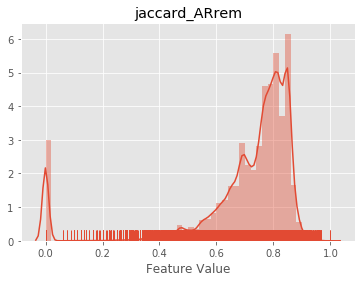

In [153]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns

for c in NUM_COLS:
    plt.close('all')
    try:
        melted = df.melt(value_vars=[c], id_vars=['label'], value_name='Feature Value')
        sns_plot = sns.distplot(melted['Feature Value'], label=c, rug=True, hist=True).set_title(f"{c}")
        fig = sns_plot.get_figure()
        fig.savefig(f"images/{c}_feat_distplot.png")
    except RuntimeError as e:
        print(f'Could not finish processing {c} because of Runtime Error: {e}')
        continue

In [ ]:

## Write Config File
config = f"""\n
# columns for dataframe
columns = {df.columns.values.tolist()}
# numerical columns to process
columns = {df.columns.values.tolist()[1:13]}
# encoded columns
"""

with open('config.py', 'w') as f:
    f.write(config)

In [45]:
bad_urls_df = df[df.label==1]

bad_urls_df.values



array([['nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526',
        10000000.0, 1.0, ..., 0.8, 0.795729, 1.0],
       ['www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php',
        10000000.0, 0.0, ..., 0.0, 0.7685770000000001, 1.0],
       ['serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/',
        10000000.0, 0.0, ..., 0.0, 0.726582, 1.0],
       ...,
       ['www.coffeewithsophieinc.com/media/system/js/cadastroempresarial2.1.php/',
        10000000.0, 0.0, ..., 0.0, 0.809947, 1.0],
       ['conseguircreditos.webs.tl/', 10000000.0, 1.0, ..., 0.5, 0.0,
        1.0],
       ['www.vbacreation.fr/includes/Archive/Connect/SignOn.php',
        10000000.0, 0.

In [46]:

## Write Config File
config = f"""\n
# columns for dataframe
columns = {df.columns.values.tolist()}
# numerical columns to process
columns = {df.columns.values.tolist()[1:13]}
# encoded columns
"""

with open('config.py', 'w') as f:
    f.write(config)

In [51]:
%ls config.py    

 Volume in drive C has no label.
 Volume Serial Number is 6AF1-33FA

 Directory of C:\Users\codebrotherone\PycharmProjects\gan-cyber

03/07/2020  03:17 PM               453 config.py
               1 File(s)            453 bytes
               0 Dir(s)  233,938,108,416 bytes free


In [34]:
df.sample(n=)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000.0,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000.0,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000.0,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000.0,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000.0,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,xbox360.ign.com/objects/850/850402.html,339.0,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
96001,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029.0,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
96002,www.gamespot.com/xbox360/action/deadspace/,753.0,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,en.wikipedia.org/wiki/Dead_Space_(video_game),6.0,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0
